# Regresión logística

El modelo de regresión logística es un modelo gráfico no dirigido que estima una probabilidad de una distribución binaria $X \sim Ber(p)$ donde $p =p(y=1|x)$ es la probabilidad de que el observable $x$ sea parte de la clase y se estima por medio de la función logísitica:

$$p(y=1|x) = \frac{1}{1+exp\{-(\theta x + \theta_0\})\}}$$

A partir de aquí se puede predecir una clase que clasifique al vector de entrada. Presentamos una implementación sencilla que utiliza el algoritmo de gradiente descendiente para aprender los pesos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

## Preparación de los datos

Utilizamos datos que cuentan con 7 varibales de observación $x_1,...,x_7$ que responden a características como animal, mamífero, tener cuatro patas, etc. El obtjetivo es determinar la probabilidad de que una observación sea o no un gato.

In [2]:
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


La variable $y$ será la columna correspondiente a ser o no gato, mientras que los observables serán el resto de las columnas.

In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
m,d = X.shape

## Aprendizaje en el modelo de regresión logística

Para realizar el aprendizaje en el modelo de regresión logística primero que nada generaremos el modelo, como sabemos el modelo aplica la función logística:

$$f(x) = \frac{1}{1 + e^{\theta x + \theta_0}}$$

Donde $\theta$ y $\theta_0$ definen los factores del modelo. El objetivo es entonces estimar esto parámetros para que la predicción hecha por el modelo sea correcto.

#### Función logística

Definimos, en principio, la función logística.

In [4]:
#Función logística
logist = lambda a: 1./(1.+np.exp(-a))

La función logística toma valores entre 0 y 1 y puede, por tanto, interpretarse como una probabilidad. En este caso es la probabilidad de que los datos observados pertenezcan a la clase 0. El comportamiento de la función logística es como de S, como puede observarse a continuación.

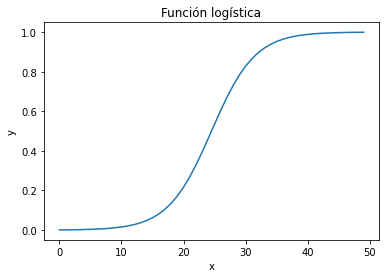

In [5]:
plt.plot(logist(np.linspace(-7,7)))
plt.title('Función logística')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Estimación de los parámetros

Para obtener los valores $\theta_i$, $i=\{0,1,...,d\}$ adecuados, usaremos el algoritmo del gradiente descendiente. Este es un algoritmo sencillo que depende del gradiente de una función de costo o riesgo que depende de los parámetros, $R(\theta)$. 

El método del gradiente descendiente actualiza los parámetros en base al gradiente y a un factor $\eta$ conocido como el rango de aprendizaje que determina que tanto cambia cada parámetro con respecto al gradiente:

$$\theta_i \leftarrow \theta_i - \eta \nabla_iR(\theta)$$

En el caso de la regresión logística para problemas binarios, nuestra función de costo estará dada por:

$$R(\theta) =  -\Big( y \log p(y=1|x) + (1-y)\log \big( 1- p(y=0|x) \big) \Big)$$

En este caso, la probabilidad se obtiene con la función logística. Notamos que las derivadas parciales (que definen el gradiente) son:

$$\frac{\partial R(\theta)}{\partial \theta_i} (p(y=1|x) - y) x_i$$

Y en el caso de $\theta_0$ se puede denotar que $x_0= 1$ siempre. Por tanto, la actualización de los parámetros se realzará como:

$$\theta_i \leftarrow \theta_i  - \eta \big( f(x) - y \big) \cdot x_i$$

Donde $f(x) = p(y=1|x)$ es la función logística. Para actualizar los parámetros utilizaremos un rango de aprendizaje $\eta =0.5$ y iteraremos varias veces el procedimiento.

In [6]:
%%time
#Número máximo de itraciones
max_its = 10
#Rango de aprendizaje
lr = 0.5

#Iniciamos theta_i con 0s
theta = np.zeros(d)
#Iniciamos theta_0 = 0
theta0 = 0

#Cuando detenerse
stop = False
t = 0
while  stop == False:
    #Revisamos cada uno de los ejemplos
    for x, y in zip(X,Y):
        #Calculamos función logística
        f = logist(np.dot(theta,x)+theta0)
        #Actualizamos los parámetros
        theta = theta - lr*(f-y)*x
        theta0 = theta0 - lr*(f-y)
   
    t += 1
    #Criterio de paro
    if t > max_its: 
        stop = True

CPU times: user 6.05 ms, sys: 1.04 ms, total: 7.09 ms
Wall time: 4.64 ms


### Aplicación de regrsión logística

Finalmente, una vez obtenido los pesos, podemos estimar las probabilidades de los objetos que estamos trabajando. En este caso, se estima la probabilidad para la calse 1 como $f(x)$ y para la clase 0 obtenemos que se puede sacar de la anterior como $1-f(x)$.

Asimismo, podemos estimar cuál es la clase que mejor se ajusta al dato observable simplemente viendo su probabilidad; si esta supera el 0.5 será de la clase 1, sino pertenecerá a la clase 0.

$$\hat{y} = \begin{cases} 1 & \text{si } f(x) > 0.5 \\ 0 & \text{en otro cas} \end{cases}$$

In [7]:
def estimate(X):
    """Estima la probabilidad con el modelo y regresa la clase"""
    #función logística
    p = logist(np.dot(X,theta)+theta0)
    #Clasificación
    cl = 1*(p > 0.5)
    
    return cl, p

Podemos ver cuáles son las clases y las probabilidades que obtuvo para los datos observados. Así como podemos estimar el error que comete al clasificar los datos.

In [8]:
clases, probs = estimate(X)
print('Clases predichas: {} \nClases esperadas: {} \nError: {}'.format(clases,Y, np.abs(clases-Y).sum(0)/len(Y)))

Clases predichas: [0 0 0 0 0 1 0 1 0 0 0 0 1 1] 
Clases esperadas: [1 0 0 0 0 1 0 1 0 0 0 0 1 1] 
Error: 0.07142857142857142


El modelo de regresión logística determina las probabilidades para la clase 1 (gato) y la clase 0 (no gato) y elige la clase que maximice la probabilidad.
Es importante obervar las probabilidades, pues estas aportan información relevante sobre la clasificación y sobre los datos que estamos eligiendo:

In [9]:
datos = pd.DataFrame(data=np.array([probs, 1-probs]).T, columns=['Prob. clase 1', 'Prob. clase 0'])
datos['Clase real'] = Y
datos['Clase predicha'] = clases
datos

,Prob. clase 1,Prob. clase 0,Clase real,Clase predicha
0,0.464137,0.535863,1,0
1,0.056811,0.943189,0,0
2,0.095876,0.904124,0,0
3,0.195629,0.804371,0,0
4,0.386437,0.613563,0,0
5,0.987273,0.012727,1,1
6,0.008696,0.991304,0,0
7,0.937893,0.062107,1,1
8,0.132661,0.867339,0,0
9,0.041961,0.958039,0,0


Asimismo, podemos ver la probabilidad y la clase que se obtienen para cualquier observable que dependa de las variables observables del modelo de regresión logística.

In [10]:
#Un ejemplo de observable
ejemplo = [[1,1,0,0,1,1,1]]
#Aplicación del modelo
cl, p = estimate(ejemplo)

print('El ejemplo {} tiene:\nProbabilidad y=1: {}; Clase: {}'.format(ejemplo, p, cl))

El ejemplo [[1, 1, 0, 0, 1, 1, 1]] tiene:
Probabilidad y=1: [0.00318444]; Clase: [0]


### Estado de creencias del modelo

Los parámetros $\theta_i$ determinan los factores del modelo, pero también nos dan información sobre el estado de creecnias del modelo. Pues cada uno de los parámetros está asociado a una variable observable $x_i$; por tanto, entre mayor sea el valor de este $\theta_i$ para ese observable, mayor será el valor que el modelo le da a este observable para decidir que pertenece a la clase ($y=1$).

,$\theta_i$
¿es animal?,-1.075021
¿es mamífero?,2.951767
¿es felino?,3.277059
¿es doméstico?,2.325535
¿tiene dos orejas?,-0.851558
¿es negro?,-2.006918
¿tiene cuatro patas?,-1.636412
$\theta_0$,-3.128148


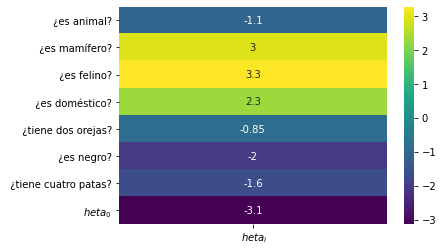

In [11]:
#DataFrame de los parámetros
beliefs = pd.DataFrame(data=np.append(theta,theta0),index=list(data.columns)[:7]+[' $\theta_0$'],columns=[' $\theta_i$'])
#Mapa de calor
heatmap(beliefs, annot=True, cmap='viridis')
beliefs